In [1]:
##################################
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import numpy as np
import random
##################################

In [2]:
df = pd.read_csv("bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
job = [ "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown"]

for ii in range(len(job)): 
    df.job[df.job == job[ii]] = ii

marital = ["divorced","married","single","unknown"]

for ii in range(len(marital)):
    df.marital[df.marital == marital[ii]] = ii

education =  ["primary","secondary","tertiary","unknown"]

for ii in range(len(education)):
    df.education[df.education == education[ii]] = ii

df.default[df.default == "no" ] = 0
df.default[df.default == "yes" ] = 1

df.housing[df.housing == "no" ] = 0
df.housing[df.housing == "yes" ] = 1

df.loan[df.loan == "no" ] = 0
df.loan[df.loan == "yes" ] = 1

contact = ["telephone","cellular","unknown"] 

for ii in range(len(contact)):
    df.contact[df.contact == contact[ii]] = ii

month = ["jan", "feb", "mar", "apr", "may","jun", "jul", "aug", "sep", "oct","nov", "dec"]

for ii in range(len(month)):
    df.month[df.month == month[ii]] = ii

poutcome = ["other","failure","success", "unknown"]


for ii in range(len(poutcome)):
    df.poutcome[df.poutcome == poutcome[ii]] = ii

df.y[df.y == "no" ] = 0
df.y[df.y == "yes" ] = 1
df.y = df.y.astype('int')

<ipython-input-3-fe928320acc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.job[df.job == job[ii]] = ii
<ipython-input-3-fe928320acc7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.marital[df.marital == marital[ii]] = ii
<ipython-input-3-fe928320acc7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.education[df.education == education[ii]] = ii
<ipython-input-3-fe928320acc7>:16: SettingWithCopyWarning: 
A value is tryi

In [4]:
sampled = df.sample(500)

sampled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4501,34,4,1,2,0,297,1,0,1,26,7,63,4,-1,0,3,0
2927,30,1,1,1,0,125,1,0,2,29,4,238,2,-1,0,3,0
100,36,1,1,1,0,0,1,0,2,6,4,337,1,-1,0,3,0
1911,26,1,1,1,0,115,1,0,2,4,6,46,3,-1,0,3,0
3071,34,9,2,1,0,347,1,0,1,6,1,154,2,197,6,1,0


In [5]:
sampled = sampled[~sampled.isin([np.nan, np.inf, -np.inf]).any(1)]
sampled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4501,34,4,1,2,0,297,1,0,1,26,7,63,4,-1,0,3,0
2927,30,1,1,1,0,125,1,0,2,29,4,238,2,-1,0,3,0
100,36,1,1,1,0,0,1,0,2,6,4,337,1,-1,0,3,0
1911,26,1,1,1,0,115,1,0,2,4,6,46,3,-1,0,3,0
3071,34,9,2,1,0,347,1,0,1,6,1,154,2,197,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,43,1,1,0,0,-98,1,1,1,12,4,112,2,330,3,0,0
2158,43,4,1,2,0,422,0,0,1,12,7,110,1,-1,0,3,0
731,48,1,1,0,0,1092,0,1,1,18,10,79,1,172,8,1,0
3844,39,0,1,1,0,607,1,0,1,12,4,454,2,364,3,1,1


[0.07258072 0.0723887  0.03790778 0.04769927 0.00128076 0.0797391
 0.03165964 0.01613718 0.03722012 0.08835234 0.0805456  0.20915175
 0.05735957 0.069305   0.03714371 0.06152877]


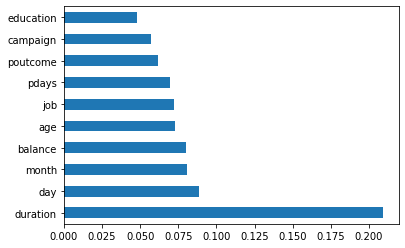

In [6]:
x = sampled.iloc[:, 0:16]
y = sampled.iloc[:, -1]
y = y.astype('int')

model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [7]:
new_df = np.array(sampled[['duration','month','day','age']])

new_df = np.nan_to_num(new_df)
new_df = new_df.astype('int')

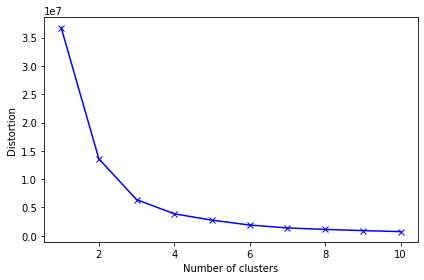

In [8]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(new_df)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

In [9]:
#Uses the Kmeans algorithm

km = KMeans(3)

km.fit(new_df)

KMeans(n_clusters=3)

In [10]:
#uses the pca algorithm to be able to easily plot the kmeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_components = pca.fit_transform(new_df)
pca_components

labels = km.labels_

In [11]:
#
pca_df = pd.DataFrame(data = pca_components, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-203.862275,-7.379132
1,-28.868373,-11.541195
2,70.177817,-4.569687
3,-220.817219,-14.441891
4,-112.821545,-6.590100


In [12]:
# sets the data for easily plotable dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-203.862275,-7.379132,0
1,-28.868373,-11.541195,0
2,70.177817,-4.569687,1
3,-220.817219,-14.441891,0
4,-112.821545,-6.590100,0


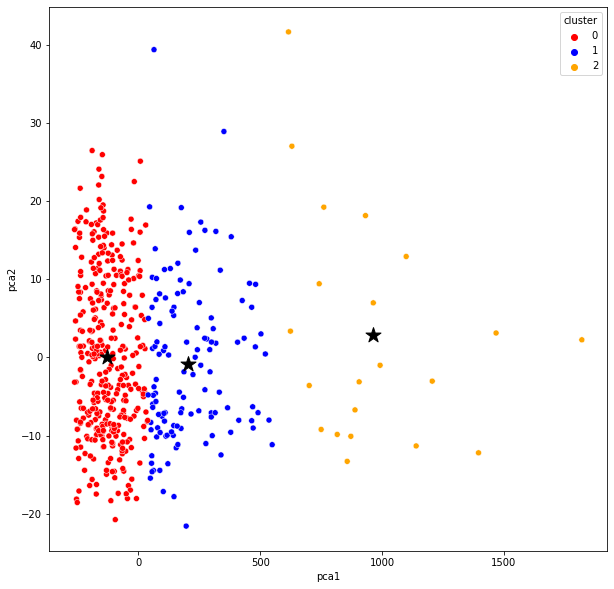

In [13]:
#Before 10 cross validation
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'blue', 'orange'])

centers_on_PCs = pca.transform(km.cluster_centers_)
plt.scatter(centers_on_PCs[:, 0], centers_on_PCs[:,1], s= 250, c = "k", marker="*")

In [14]:
#10-fold validation
print("Percentage of positives")
sampled['y'].value_counts()/len(sampled)

Percentage of positives


0    0.884
1    0.116
Name: y, dtype: float64

In [15]:
#Set up data for train
x = new_df
y = np.array(sampled['y'])

In [16]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1)

cv=KFold(n_splits=10, shuffle=True, random_state=1)

predicted_score = cross_val_score(clf, x, y, cv=cv)


In [17]:
from numpy import mean, std
print('Accuracy: %.3f ( +/- %.3f)' % (mean(predicted_score), std(predicted_score)))

Accuracy: 0.884 ( +/- 0.067)


In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_predict

X_train, X_test, Y_train, Y_test = train_test_split(new_df, y,train_size = 0.8, random_state=1)

clf = LinearDiscriminantAnalysis()
clf.fit(new_df, y)

predicted = cross_val_predict(clf, new_df, y, cv=cv)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
data = {'y_Actual': sampled['y'],
        'y_Predicted': predicted}

data = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted'])
data

,y_Actual,y_Predicted
4501,0,0
2927,0,0
100,0,0
1911,0,0
3071,0,0
...,...,...
1262,0,0
2158,0,0
731,0,0
3844,1,0


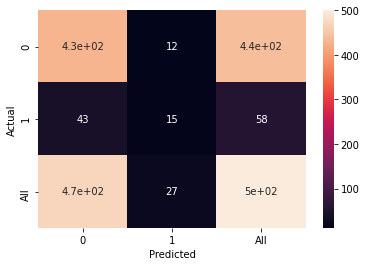

In [20]:
confusion_matrix = pd.crosstab(data['y_Actual'], data['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins= True)

sns.heatmap(confusion_matrix, annot=True)
plt.show()

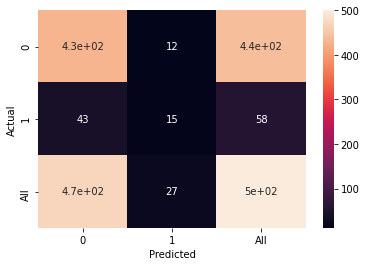

In [22]:
confusion_matrix = pd.crosstab(data['y_Actual'], data['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins= True)

sns.heatmap(confusion_matrix, annot=True)
plt.show()